## **Stock Market Forecasting Analysis**

The primary objective of this project is to develop a predictive model that forecasts stock prices for the next 30 days using historical stock data from 2012 to 2019. The model will help investors, traders, and financial analysts make informed decisions based on stock trends and potential market movements.


Attribute information:

● Date: Trading date

● Open: Opening price of Apple stock for the day

● High: Highest price reached during the day

● Low: Lowest price reached during the day

● Close: Closing price of Apple stock for the day

● Volume: Number of shares traded on that day


In [174]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
from statsmodels.tsa.seasonal import seasonal_decompose
import plotly.express as px

In [175]:
# Load the Dataset
df = pd.read_csv('AAPL.csv')#, #parse_dates=['Date'])
#df.sort_values('Date', inplace=True)
#df.set_index('Date', inplace=True)

In [176]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,03-01-2012,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
1,04-01-2012,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2,05-01-2012,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
3,06-01-2012,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
4,09-01-2012,60.785713,61.107143,60.192856,60.247143,52.061932,98506100


In [177]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2006,23-12-2019,280.529999,284.250000,280.369995,284.000000,282.054138,24643000
2007,24-12-2019,284.690002,284.890015,282.920013,284.269989,282.322266,12119700
2008,26-12-2019,284.820007,289.980011,284.700012,289.910004,287.923645,23280300
2009,27-12-2019,291.119995,293.970001,288.119995,289.799988,287.814392,36566500
2010,30-12-2019,289.459991,292.690002,285.220001,291.519989,289.522614,36028600


### Data Preprocessing

In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2011 entries, 0 to 2010
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2011 non-null   object 
 1   Open       2011 non-null   float64
 2   High       2011 non-null   float64
 3   Low        2011 non-null   float64
 4   Close      2011 non-null   float64
 5   Adj Close  2011 non-null   float64
 6   Volume     2011 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 110.1+ KB


In [179]:
df.shape

(2011, 7)

In [180]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2.011000e+03
mean,126.707469,127.827594,125.580258,126.741235,119.505548,5.949670e+07
std,50.483753,50.926301,50.124940,50.578369,52.438444,4.683856e+07
min,55.424286,57.085712,55.014286,55.790001,48.921928,1.136200e+07
25%,85.882858,86.717858,85.056427,86.202145,75.056679,2.758565e+07
50%,113.050003,114.190002,111.870003,113.050003,105.222908,4.346900e+07
75%,165.190002,167.409996,163.424995,165.245002,160.047111,7.471030e+07
max,291.119995,293.970001,288.119995,291.519989,289.522614,3.765300e+08


In [181]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [182]:
# Fill or drop missing values
df = df.ffill().bfill()

In [183]:
df.shape

(2011, 7)

In [184]:
df.duplicated().any()

False

### Data Visualizations

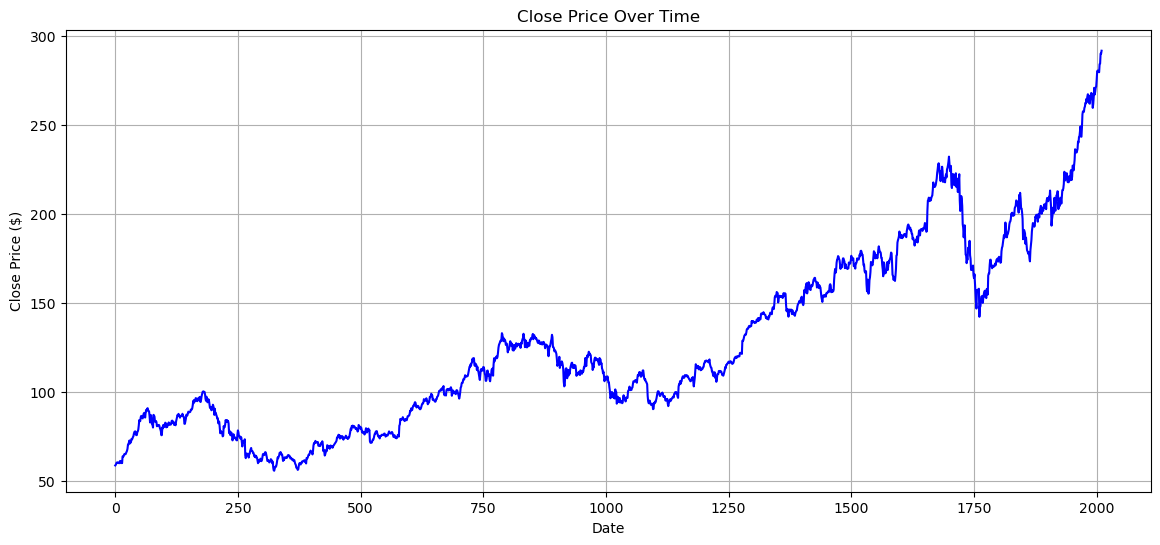

In [185]:
# Time Series Plot of 'Close' Price
plt.figure(figsize=(14, 6))
plt.plot(df['Close'], label='Close Price', color='blue')
plt.title('Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price ($)')
plt.grid(True)
plt.show()

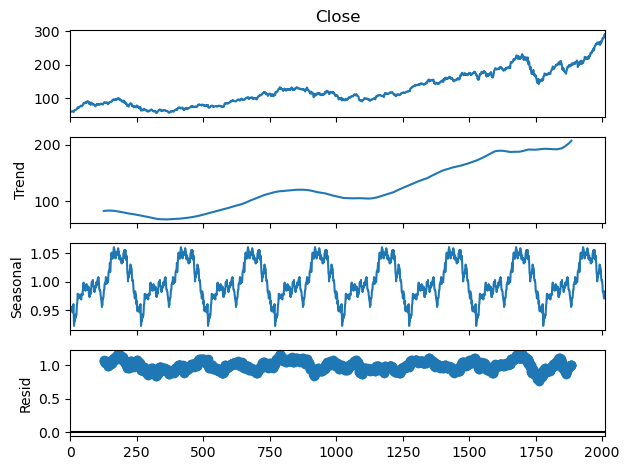

In [186]:
# Seasonality and trend

from statsmodels.tsa.seasonal import seasonal_decompose

# Ensure datetime index
#df['Date'] = pd.to_datetime(df['Date'])
#df.set_index('Date', inplace=True)

# Decompose using multiplicative model
result = seasonal_decompose(df['Close'], model='multiplicative', period=252)  # ~252 trading days in a year
result.plot()
plt.tight_layout()
plt.show()

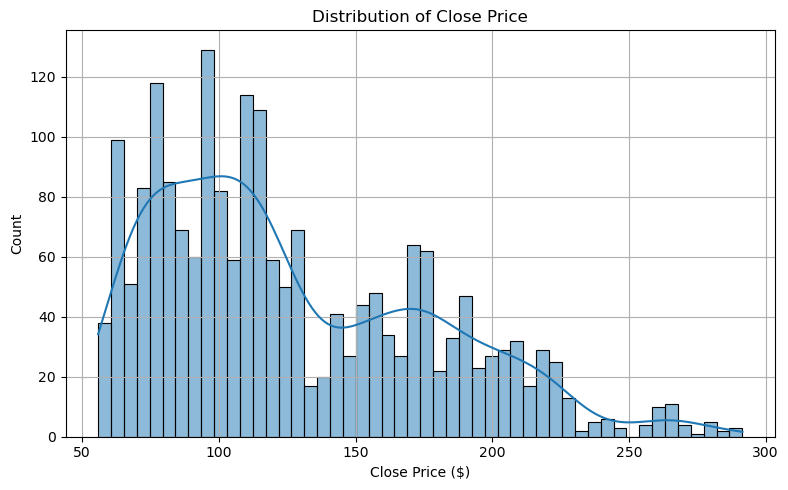

In [187]:
# Distribution of Close Prices
plt.figure(figsize=(8, 5))
sns.histplot(df['Close'], kde=True, bins=50)
plt.title('Distribution of Close Price')
plt.xlabel('Close Price ($)')
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_11096\590252972.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Close'], shade=True, color='purple', linewidth=2)


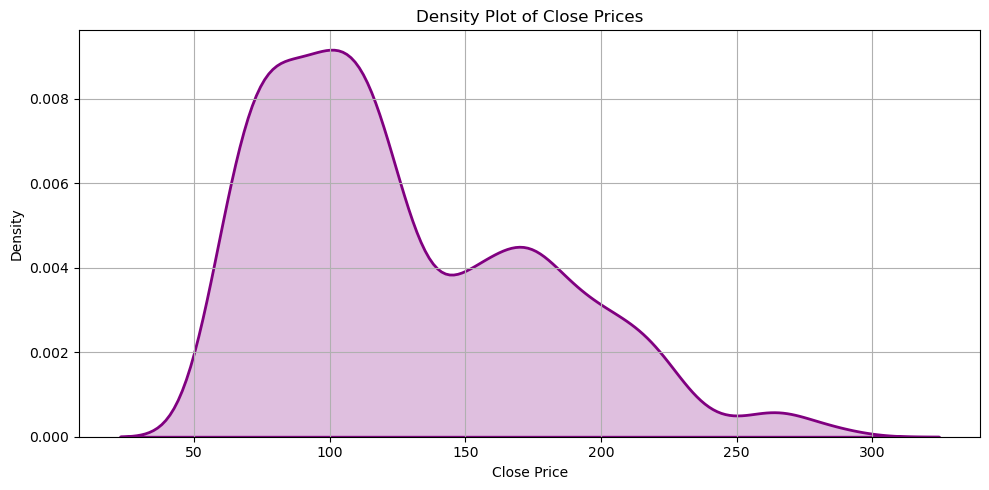

In [188]:
# Density Plot
plt.figure(figsize=(10, 5))
sns.kdeplot(df['Close'], shade=True, color='purple', linewidth=2)
plt.title('Density Plot of Close Prices')
plt.xlabel('Close Price')
plt.ylabel('Density')
plt.grid(True)
plt.tight_layout()
plt.show()

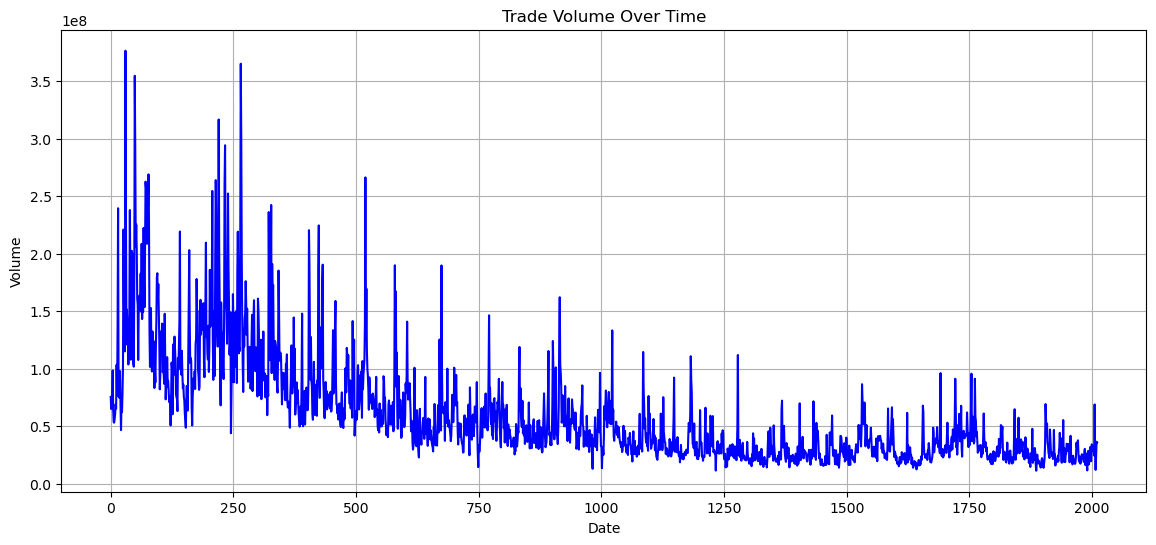

In [189]:
# Time Series Plot of 'Trade Volume'
plt.figure(figsize=(14,6))
plt.plot(df['Volume'], label='Trade Volume', color='blue')
plt.title('Trade Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.grid(True)
plt.show()


In [190]:
#Yearly and Monthly Trends
# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')

# Drop rows where Date parsing failed
df.dropna(subset=['Date'], inplace=True)

# Set as index
df.set_index('Date', inplace=True)

# Extract year and month
df['Year'] = df.index.year
df['Month'] = df.index.month


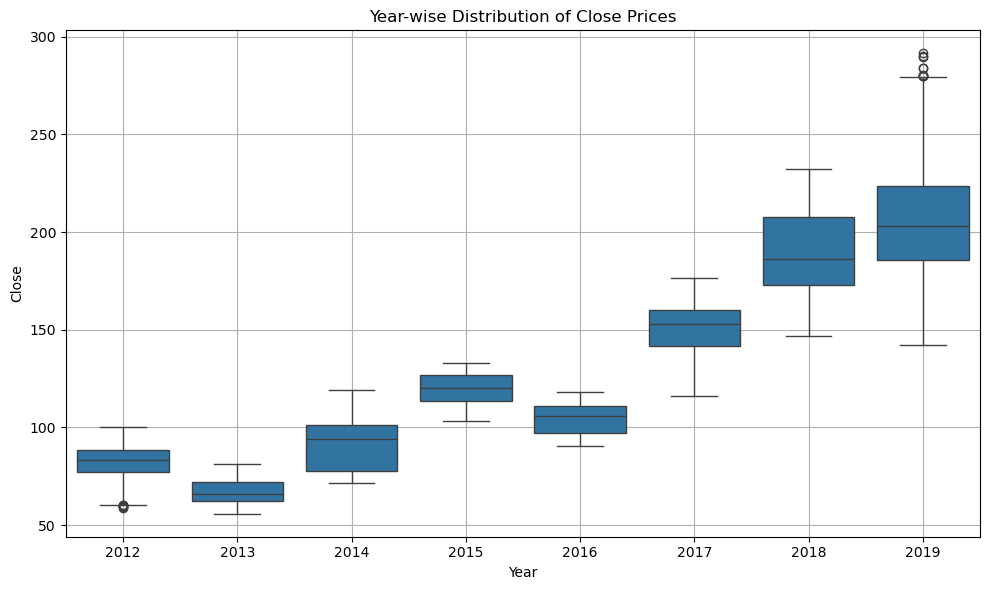

In [191]:
# Yearly Mean Close Price Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Year', y='Close', data=df)
plt.title('Year-wise Distribution of Close Prices')
plt.grid(True)
plt.tight_layout()
plt.show()

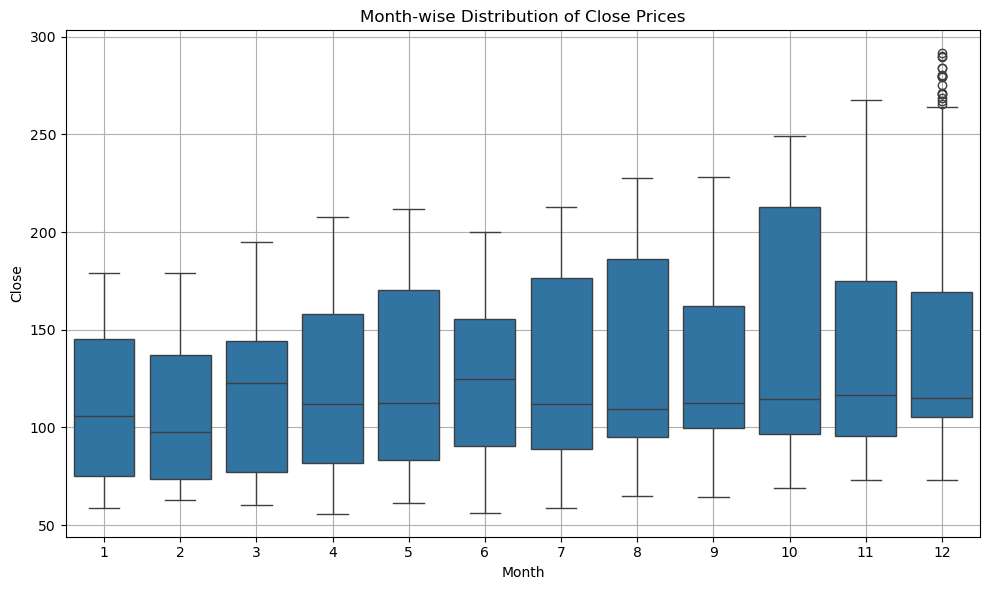

In [192]:
# Monthly Mean Close Price Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Month', y='Close', data=df)
plt.title('Month-wise Distribution of Close Prices')
plt.grid(True)
plt.tight_layout()
plt.show()

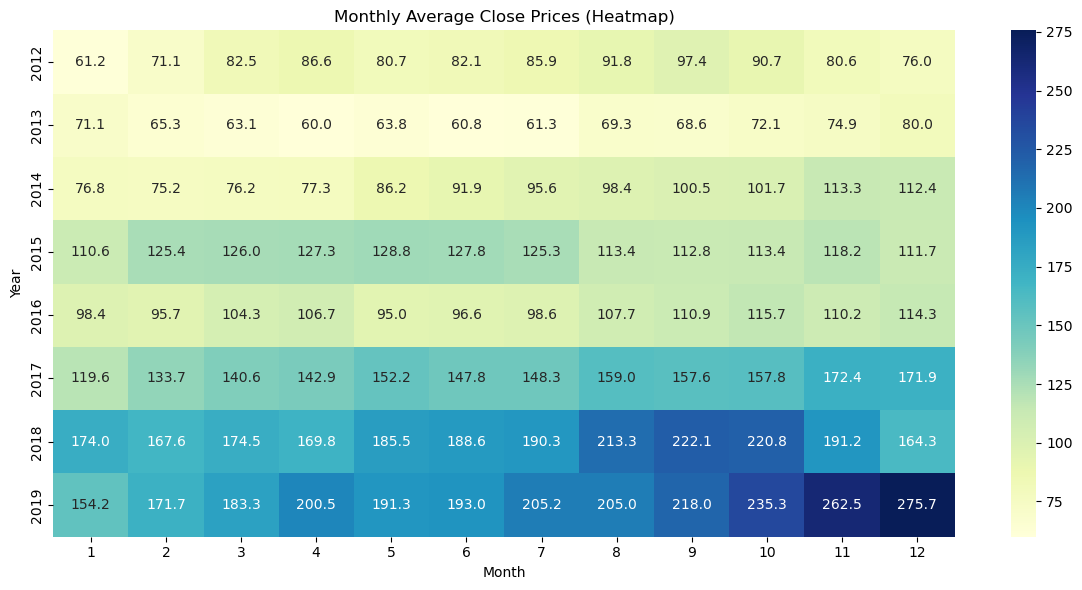

In [193]:
# Monthly Average Close Prices Heatmap

# Create Pivot Table
monthly_avg = df.pivot_table(values='Close', index='Year', columns='Month', aggfunc='mean')

plt.figure(figsize=(12, 6))
sns.heatmap(monthly_avg, cmap='YlGnBu', annot=True, fmt=".1f")
plt.title('Monthly Average Close Prices (Heatmap)')
plt.xlabel('Month')
plt.ylabel('Year')
plt.tight_layout()
plt.show()


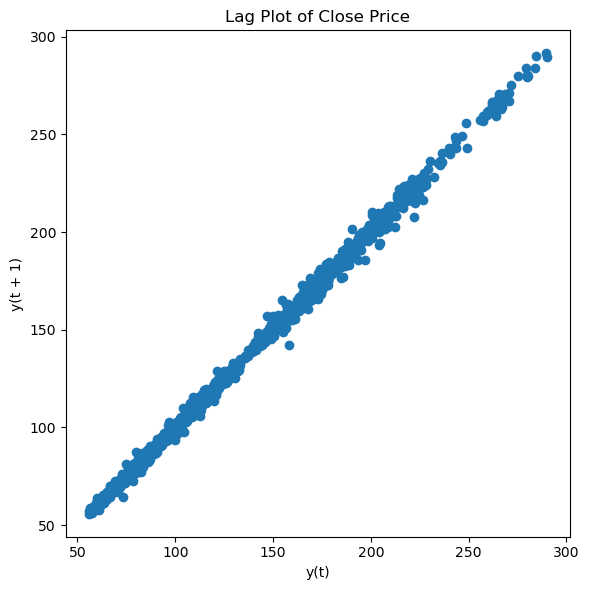

In [194]:
#Lag Plots (Auto-correlation Behavior)
from pandas.plotting import lag_plot

plt.figure(figsize=(6, 6))
lag_plot(df['Close'])
plt.title('Lag Plot of Close Price')
plt.tight_layout()
plt.show()


<Figure size 1200x500 with 0 Axes>

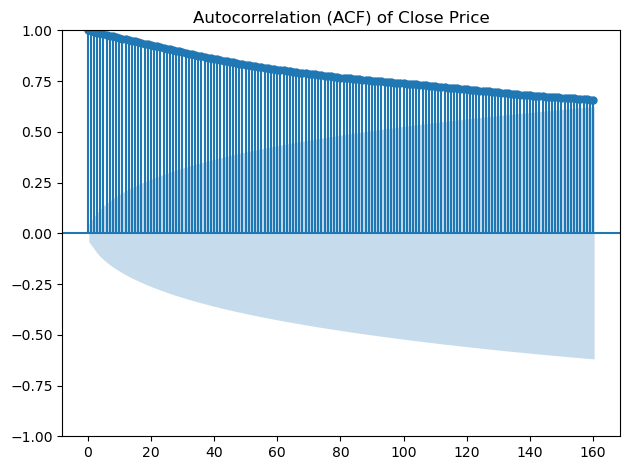

<Figure size 1200x500 with 0 Axes>

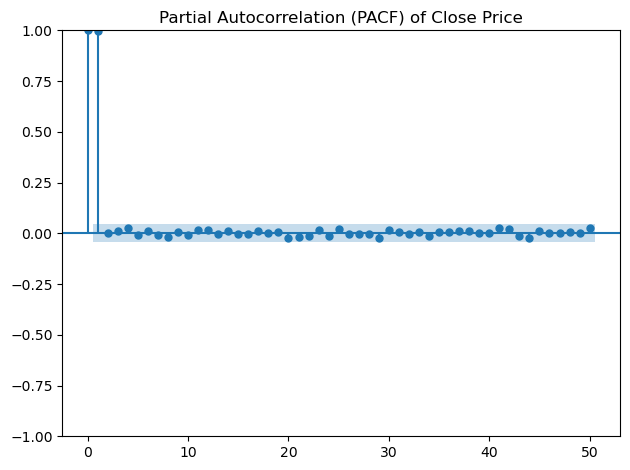

In [195]:
#Autocorrelation and Partial Autocorrelation (ACF/PACF)
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(12, 5))
plot_acf(df['Close'].dropna(), lags=160)
plt.title('Autocorrelation (ACF) of Close Price')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 5))
plot_pacf(df['Close'].dropna(), lags=50)
plt.title('Partial Autocorrelation (PACF) of Close Price')
plt.tight_layout()
plt.show()


### Data Transformation

In [196]:
df1=pd.read_csv('AAPL.csv')
df1.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,03-01-2012,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
1,04-01-2012,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2,05-01-2012,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
3,06-01-2012,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
4,09-01-2012,60.785713,61.107143,60.192856,60.247143,52.061932,98506100


In [197]:
df1=df1.drop(columns=['Open','High','Low','Volume','Adj Close'])
df1.head()

,Date,Close
0,03-01-2012,58.747143
1,04-01-2012,59.062859
2,05-01-2012,59.718571
3,06-01-2012,60.342857
4,09-01-2012,60.247143


In [198]:
df1['Date'] = pd.to_datetime(df1['Date'], format="%d-%m-%Y")  # or "%Y-%m-%d" depending on format
df1 = df1.sort_values('Date')
df1.set_index('Date', inplace=True)

In [199]:
df1.head()

,Close
Date,
2012-01-03,58.747143
2012-01-04,59.062859
2012-01-05,59.718571
2012-01-06,60.342857
2012-01-09,60.247143


In [200]:
df1['Close_log'] = np.log(df1['Close'])
df1.head()

,Close,Close_log
Date,,
2012-01-03,58.747143,4.073243
2012-01-04,59.062859,4.078602
2012-01-05,59.718571,4.089643
2012-01-06,60.342857,4.100043
2012-01-09,60.247143,4.098455


In [201]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df1['Close_log'].dropna())
print("ADF Statistic:", result[0])
print("p-value:", result[1])


ADF Statistic: -0.27401408154661927
p-value: 0.9291049337727731


In [202]:
df1['Close_log_diff'] = df1['Close_log'].diff().dropna()

=== ADF Test on Close_log ===
ADF Statistic: -0.27401408154661927
p-value: 0.9291049337727731

=== ADF Test on Close_log_diff ===
ADF Statistic: -15.75557
p-value: 1.208815627617507e-28
p-value rounded: 0.0


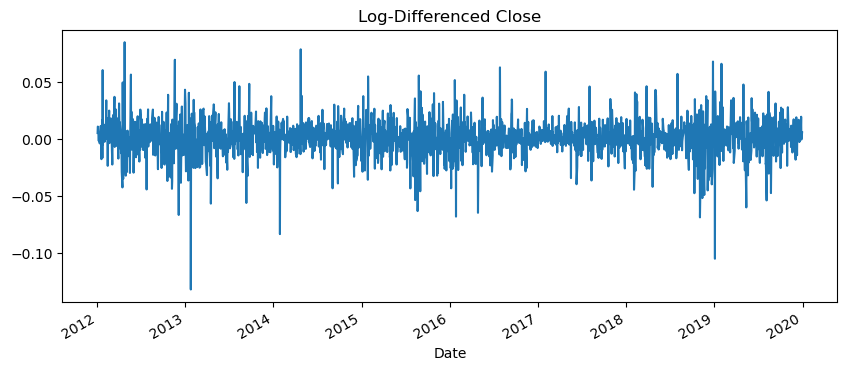

In [203]:
# Step 3: ADF Test on 'Close_log'
print("=== ADF Test on Close_log ===")
result_log = adfuller(df1['Close_log'].dropna())
print(f"ADF Statistic: {result_log[0]}")
print(f"p-value: {result_log[1]}")

# Step 4: If p-value > 0.05, apply differencing
if result_log[1] > 0.05:
    df1['Close_log_diff'] = df1['Close_log'].diff().dropna()

    # Step 5: ADF Test on 'Close_log_diff'
    print("\n=== ADF Test on Close_log_diff ===")
    result_diff = adfuller(df1['Close_log_diff'].dropna())
    print(f"ADF Statistic: {round(result_diff[0],5)}")
    print(f"p-value: {result_diff[1]}")
    print(f"p-value rounded: {round(result_diff[1],2)}")

    # Optional: plot to visualize
    df1['Close_log_diff'].plot(title='Log-Differenced Close', figsize=(10, 4))
    plt.show()

else:
    print("\nData is already stationary after log transformation. No differencing needed.")

In [204]:
df1.head()

,Close,Close_log,Close_log_diff
Date,,,
2012-01-03,58.747143,4.073243,NaN
2012-01-04,59.062859,4.078602,0.005360
2012-01-05,59.718571,4.089643,0.011041
2012-01-06,60.342857,4.100043,0.010400
2012-01-09,60.247143,4.098455,-0.001587


In [205]:
df1.isnull().sum()

Close             0
Close_log         0
Close_log_diff    1
dtype: int64

### Model Building and Evaluation

In [206]:
df = df.asfreq("B")  # Business day frequency
df['Close'].interpolate(inplace=True)  # Handle missing data

C:\Users\user\AppData\Local\Temp\ipykernel_11096\4161438918.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Close'].interpolate(inplace=True)  # Handle missing data


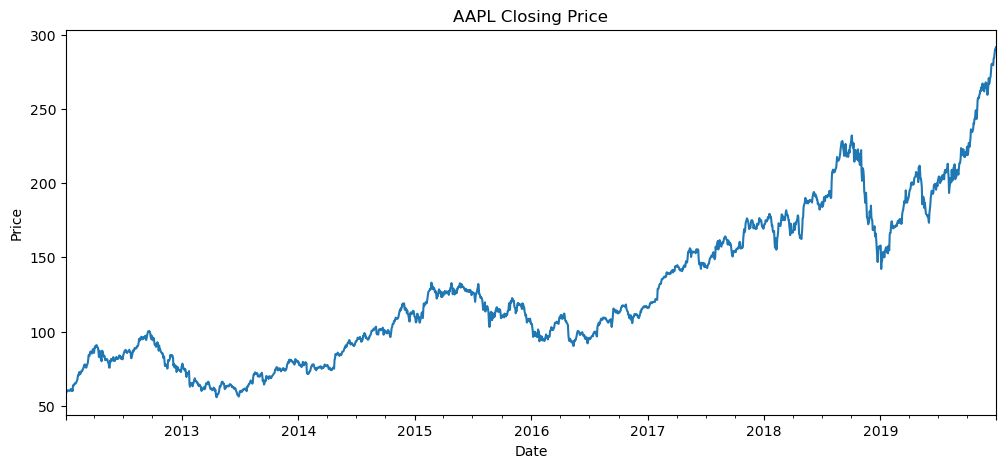

In [207]:
# Plot the closing price
df['Close'].plot(figsize=(12, 5), title="AAPL Closing Price")
plt.ylabel("Price")
plt.show()

In [208]:
# Use last 20% as test
test_size = int(0.2 * len(df))
train = df['Close'][:-test_size]
test = df['Close'][-test_size:]

#### **ARIMA Model**

In [209]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Build and fit ARIMA
model_arima = ARIMA(train, order=(5, 1, 0))
fit_arima = model_arima.fit()

# Forecast
forecast_arima = fit_arima.forecast(steps=len(test))

In [210]:
# Evaluation
mse_arima = mean_squared_error(test, forecast_arima)
print("ARIMA MSE:", mse_arima)

ARIMA MSE: 1179.9445524162334


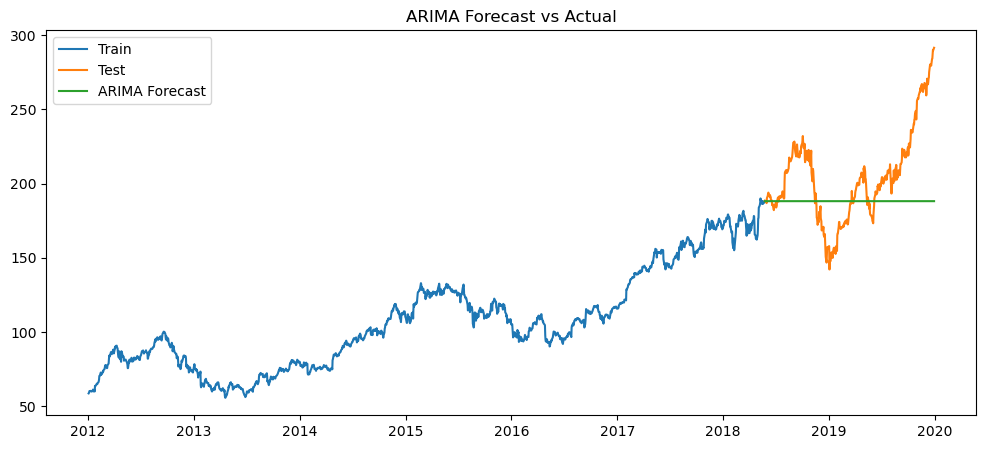

In [211]:
# Plot
plt.figure(figsize=(12, 5))
plt.plot(train, label="Train")
plt.plot(test, label="Test")
plt.plot(forecast_arima, label="ARIMA Forecast")
plt.legend()
plt.title("ARIMA Forecast vs Actual")
plt.show()

#### **SARIMA Model**

In [212]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# SARIMA(p,d,q)(P,D,Q,s) → weekly seasonality (s=5)
model_sarima = SARIMAX(train, order=(1,1,1), seasonal_order=(1,1,1,5))
fit_sarima = model_sarima.fit()

forecast_sarima = fit_sarima.forecast(steps=len(test))

In [213]:
# Evaluation
mse_sarima = mean_squared_error(test, forecast_sarima)
print("SARIMA MSE:", mse_sarima)


SARIMA MSE: 715.3615968987837


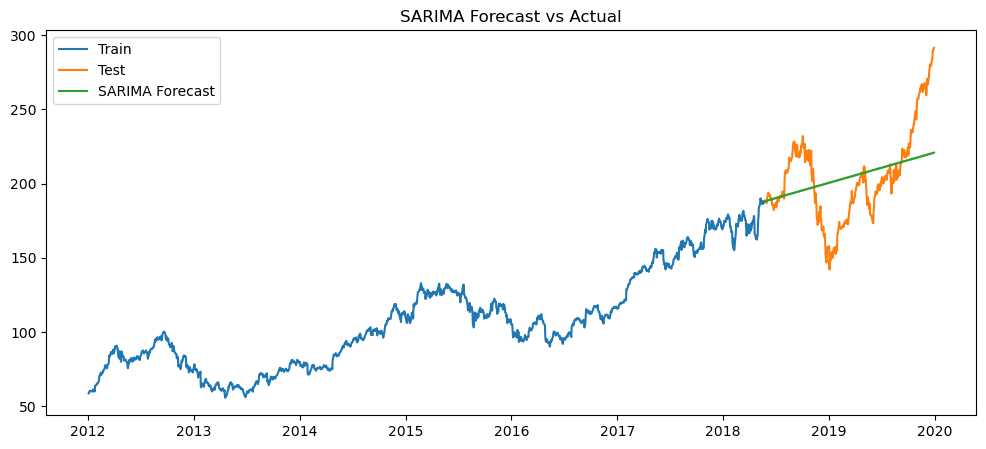

In [214]:
# Plot
plt.figure(figsize=(12, 5))
plt.plot(train, label="Train")
plt.plot(test, label="Test")
plt.plot(forecast_sarima, label="SARIMA Forecast")
plt.legend()
plt.title("SARIMA Forecast vs Actual")
plt.show()

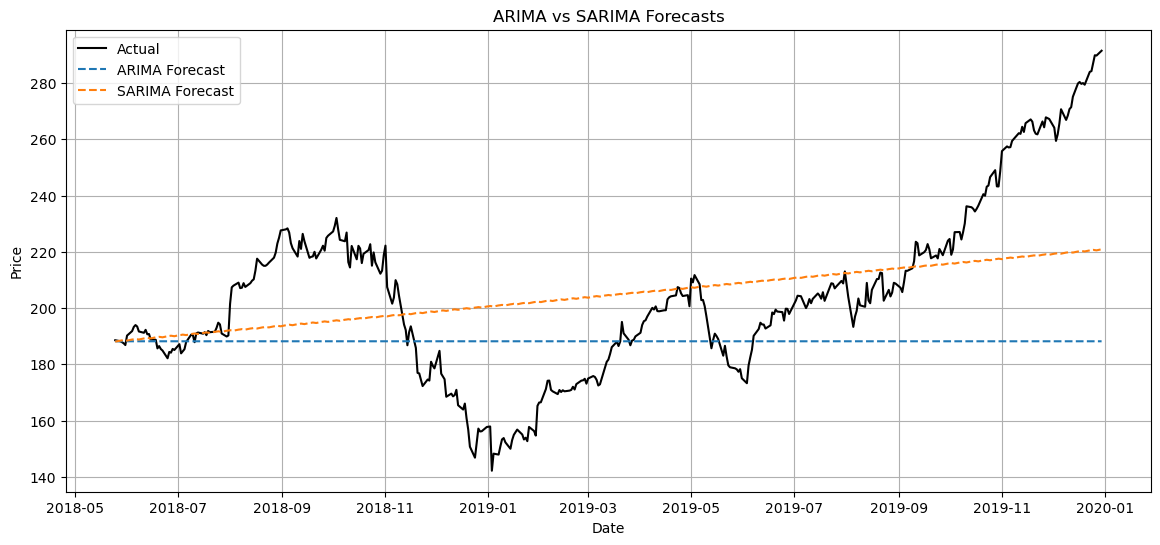

In [215]:
#Forecast Comparison (ARIMA vs SARIMA)

plt.figure(figsize=(14, 6))
plt.plot(test.index, test, label="Actual", color='black')
plt.plot(test.index, forecast_arima, label="ARIMA Forecast", linestyle="--")
plt.plot(test.index, forecast_sarima, label="SARIMA Forecast", linestyle="--")
plt.title("ARIMA vs SARIMA Forecasts")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()

### ML MODELS

In [216]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable


In [217]:
import pandas as pd
import numpy as np

#Load and parse 'Date' column
df = pd.read_csv('AAPL.csv', parse_dates=['Date'])

In [218]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,03-01-2012,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
1,04-01-2012,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2,05-01-2012,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
3,06-01-2012,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
4,09-01-2012,60.785713,61.107143,60.192856,60.247143,52.061932,98506100


In [219]:
# Sort by date
df.sort_values('Date', inplace=True)

In [220]:
# Handle missing values
df = df.dropna()  # You can also use df.fillna(method='ffill') if continuity is important

In [221]:
# Ensure Date is datetime
df['Date'] = pd.to_datetime(df['Date'], format="%d-%m-%Y")

### Feature Engineering

In [222]:
# Date-based features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Weekday'] = df['Date'].dt.weekday
df['Day'] = df['Date'].dt.day
df['DayOfYear'] = df['Date'].dt.dayofyear

In [223]:
# Lag features (previous day prices)
for lag in [1, 2, 3, 5, 7, 14]:
    df[f'Close_lag_{lag}'] = df['Close'].shift(lag)

In [224]:
# Rolling window features (trend/volatility) 
rolling_windows = [7, 14]

for window in rolling_windows:
    df[f'Close_roll_mean_{window}'] = df['Close'].rolling(window=window).mean()
    df[f'Close_roll_std_{window}'] = df['Close'].rolling(window=window).std()
    df[f'Volume_roll_mean_{window}'] = df['Volume'].rolling(window=window).mean()

In [225]:
# Daily returns 
df['Return_1d'] = df['Close'].pct_change()

In [226]:
# Volatility / price range features
df['High_Low_Spread'] = df['High'] - df['Low']
df['Body'] = abs(df['Open'] - df['Close'])

In [227]:
# Normalized ratios 
df['Close/Open'] = df['Close'] / df['Open']
df['Close/High'] = df['Close'] / df['High']
df['Close/Low'] = df['Close'] / df['Low']

In [228]:
# Drop NaNs from rolling/lags
df.dropna(inplace=True)

# Normalize 'Close' if needed (not necessary for tree models)
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#df['Close'] = scaler.fit_transform(df[['Close']])

df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month,Weekday,...,Volume_roll_mean_7,Close_roll_mean_14,Close_roll_std_14,Volume_roll_mean_14,Return_1d,High_Low_Spread,Body,Close/Open,Close/High,Close/Low
815,2015-04-01,124.820000,125.120003,123.099998,124.250000,113.828323,40621400,2015,4,2,...,4.996490e+07,115.482244,43.980975,7.331303e+07,0.605742,2.020005,0.570000,0.995433,0.993047,1.009342
1067,2016-04-01,108.779999,110.000000,108.199997,109.989998,102.632294,25874000,2016,4,4,...,4.646017e+07,118.709897,41.567514,6.552752e+07,-0.114769,1.800003,1.209999,1.011123,0.999909,1.016543
1821,2019-04-01,191.639999,191.679993,188.380005,191.240005,187.920776,27862000,2019,4,0,...,4.523837e+07,125.482041,45.221091,6.459313e+07,0.738704,3.299988,0.399994,0.997913,0.997705,1.015182
82,2012-05-01,83.557144,85.251427,83.032860,83.161430,71.863052,152749800,2012,5,1,...,6.008806e+07,122.225714,46.588390,6.750490e+07,-0.565146,2.218567,0.395714,0.995264,0.975484,1.001548
332,2013-05-01,63.494286,63.561428,62.055714,62.755714,55.030113,126727300,2013,5,2,...,7.449393e+07,114.723980,47.141227,7.318322e+07,-0.245375,1.505714,0.738572,0.988368,0.987324,1.011280


In [229]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Year',
       'Month', 'Weekday', 'Day', 'DayOfYear', 'Close_lag_1', 'Close_lag_2',
       'Close_lag_3', 'Close_lag_5', 'Close_lag_7', 'Close_lag_14',
       'Close_roll_mean_7', 'Close_roll_std_7', 'Volume_roll_mean_7',
       'Close_roll_mean_14', 'Close_roll_std_14', 'Volume_roll_mean_14',
       'Return_1d', 'High_Low_Spread', 'Body', 'Close/Open', 'Close/High',
       'Close/Low'],
      dtype='object')

In [230]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month,Weekday,...,Volume_roll_mean_7,Close_roll_mean_14,Close_roll_std_14,Volume_roll_mean_14,Return_1d,High_Low_Spread,Body,Close/Open,Close/High,Close/Low
815,2015-04-01,124.820000,125.120003,123.099998,124.250000,113.828323,40621400,2015,4,2,...,4.996490e+07,115.482244,43.980975,7.331303e+07,0.605742,2.020005,0.570000,0.995433,0.993047,1.009342
1067,2016-04-01,108.779999,110.000000,108.199997,109.989998,102.632294,25874000,2016,4,4,...,4.646017e+07,118.709897,41.567514,6.552752e+07,-0.114769,1.800003,1.209999,1.011123,0.999909,1.016543
1821,2019-04-01,191.639999,191.679993,188.380005,191.240005,187.920776,27862000,2019,4,0,...,4.523837e+07,125.482041,45.221091,6.459313e+07,0.738704,3.299988,0.399994,0.997913,0.997705,1.015182
82,2012-05-01,83.557144,85.251427,83.032860,83.161430,71.863052,152749800,2012,5,1,...,6.008806e+07,122.225714,46.588390,6.750490e+07,-0.565146,2.218567,0.395714,0.995264,0.975484,1.001548
332,2013-05-01,63.494286,63.561428,62.055714,62.755714,55.030113,126727300,2013,5,2,...,7.449393e+07,114.723980,47.141227,7.318322e+07,-0.245375,1.505714,0.738572,0.988368,0.987324,1.011280


In [231]:
df.isnull().sum()

Date                   0
Open                   0
High                   0
Low                    0
Close                  0
Adj Close              0
Volume                 0
Year                   0
Month                  0
Weekday                0
Day                    0
DayOfYear              0
Close_lag_1            0
Close_lag_2            0
Close_lag_3            0
Close_lag_5            0
Close_lag_7            0
Close_lag_14           0
Close_roll_mean_7      0
Close_roll_std_7       0
Volume_roll_mean_7     0
Close_roll_mean_14     0
Close_roll_std_14      0
Volume_roll_mean_14    0
Return_1d              0
High_Low_Spread        0
Body                   0
Close/Open             0
Close/High             0
Close/Low              0
dtype: int64

In [232]:
df.shape

(1997, 30)

In [233]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load  prepared dataframe
df = df.copy()  
df = df.dropna()  # Drop rows with NaN from lag/rolling features
df.shape

(1997, 30)

In [234]:
df=df.drop(columns=['Open','High','Low','Adj Close','Volume'])
df.head()

,Date,Close,Year,Month,Weekday,Day,DayOfYear,Close_lag_1,Close_lag_2,Close_lag_3,...,Volume_roll_mean_7,Close_roll_mean_14,Close_roll_std_14,Volume_roll_mean_14,Return_1d,High_Low_Spread,Body,Close/Open,Close/High,Close/Low
815,2015-04-01,124.250000,2015,4,2,1,91,77.378571,61.272858,174.970001,...,4.996490e+07,115.482244,43.980975,7.331303e+07,0.605742,2.020005,0.570000,0.995433,0.993047,1.009342
1067,2016-04-01,109.989998,2016,4,4,1,92,124.250000,77.378571,61.272858,...,4.646017e+07,118.709897,41.567514,6.552752e+07,-0.114769,1.800003,1.209999,1.011123,0.999909,1.016543
1821,2019-04-01,191.240005,2019,4,0,1,91,109.989998,124.250000,77.378571,...,4.523837e+07,125.482041,45.221091,6.459313e+07,0.738704,3.299988,0.399994,0.997913,0.997705,1.015182
82,2012-05-01,83.161430,2012,5,1,1,122,191.240005,109.989998,124.250000,...,6.008806e+07,122.225714,46.588390,6.750490e+07,-0.565146,2.218567,0.395714,0.995264,0.975484,1.001548
332,2013-05-01,62.755714,2013,5,2,1,121,83.161430,191.240005,109.989998,...,7.449393e+07,114.723980,47.141227,7.318322e+07,-0.245375,1.505714,0.738572,0.988368,0.987324,1.011280


In [235]:
# Define Features and Target
features = df.drop(columns=['Date','Close'])# 'Date'
target = df['Close']
features.head()

,Year,Month,Weekday,Day,DayOfYear,Close_lag_1,Close_lag_2,Close_lag_3,Close_lag_5,Close_lag_7,...,Volume_roll_mean_7,Close_roll_mean_14,Close_roll_std_14,Volume_roll_mean_14,Return_1d,High_Low_Spread,Body,Close/Open,Close/High,Close/Low
815,2015,4,2,1,91,77.378571,61.272858,174.970001,139.789993,61.495716,...,4.996490e+07,115.482244,43.980975,7.331303e+07,0.605742,2.020005,0.570000,0.995433,0.993047,1.009342
1067,2016,4,4,1,92,124.250000,77.378571,61.272858,175.000000,100.529999,...,4.646017e+07,118.709897,41.567514,6.552752e+07,-0.114769,1.800003,1.209999,1.011123,0.999909,1.016543
1821,2019,4,0,1,91,109.989998,124.250000,77.378571,174.970001,139.789993,...,4.523837e+07,125.482041,45.221091,6.459313e+07,0.738704,3.299988,0.399994,0.997913,0.997705,1.015182
82,2012,5,1,1,122,191.240005,109.989998,124.250000,61.272858,175.000000,...,6.008806e+07,122.225714,46.588390,6.750490e+07,-0.565146,2.218567,0.395714,0.995264,0.975484,1.001548
332,2013,5,2,1,121,83.161430,191.240005,109.989998,77.378571,174.970001,...,7.449393e+07,114.723980,47.141227,7.318322e+07,-0.245375,1.505714,0.738572,0.988368,0.987324,1.011280


In [236]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1997 entries, 815 to 1759
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 1997 non-null   int32  
 1   Month                1997 non-null   int32  
 2   Weekday              1997 non-null   int32  
 3   Day                  1997 non-null   int32  
 4   DayOfYear            1997 non-null   int32  
 5   Close_lag_1          1997 non-null   float64
 6   Close_lag_2          1997 non-null   float64
 7   Close_lag_3          1997 non-null   float64
 8   Close_lag_5          1997 non-null   float64
 9   Close_lag_7          1997 non-null   float64
 10  Close_lag_14         1997 non-null   float64
 11  Close_roll_mean_7    1997 non-null   float64
 12  Close_roll_std_7     1997 non-null   float64
 13  Volume_roll_mean_7   1997 non-null   float64
 14  Close_roll_mean_14   1997 non-null   float64
 15  Close_roll_std_14    1997 non-null   floa

In [237]:
target.head()

815     124.250000
1067    109.989998
1821    191.240005
82       83.161430
332      62.755714
Name: Close, dtype: float64

In [238]:
# Train-Test Split (last 30 for test to simulate forecasting)
X_train, X_test = features.iloc[:-30], features.iloc[-30:]
y_train, y_test = target.iloc[:-30], target.iloc[-30:]
dates_test = df['Date'].iloc[-30:]  # for plotting

In [239]:
# Train Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

In [240]:
# Train XGBoost
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_test)

In [241]:
# Evaluate models
def evaluate_model(name, y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    print(f"{name} Performance:\nRMSE: {rmse:.2f}\nMAE: {mae:.2f}\n")

evaluate_model("Random Forest", y_test, rf_preds)
evaluate_model("XGBoost", y_test, xgb_preds)

Random Forest Performance:
RMSE: 6.60
MAE: 3.85

XGBoost Performance:
RMSE: 4.31
MAE: 2.72



In [242]:
# Hyperparameter Tuning ( for RandomForest)
rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5,None]
}

grid = GridSearchCV(RandomForestRegressor(random_state=42), rf_param_grid, cv=5, scoring='neg_mean_squared_error')
grid.fit(X_train, y_train)

print("Best RandomForest Params:", grid.best_params_)
best_rf = grid.best_estimator_
grid_predsrf = best_rf.predict(X_test)

Best RandomForest Params: {'max_depth': None, 'n_estimators': 100}


In [243]:
# Final Evaluation of Tuned Model
evaluate_model("Tuned RandomForest", y_test, grid_predsrf)

Tuned RandomForest Performance:
RMSE: 6.60
MAE: 3.85



In [244]:
# Hyperparameter Tuning ( for XGBoost)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5,None],
    'learning_rate': [0.01, 0.1],
}

grid = GridSearchCV(XGBRegressor(random_state=42), param_grid, cv=3, scoring='neg_mean_squared_error')
grid.fit(X_train, y_train)

print("Best XGBoost Params:", grid.best_params_)
best_xgb = grid.best_estimator_
grid_preds = best_xgb.predict(X_test)

Best XGBoost Params: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}


In [245]:
# Final Evaluation of Tuned Model
evaluate_model("Tuned XGBoost", y_test, grid_preds)

Tuned XGBoost Performance:
RMSE: 6.20
MAE: 3.23



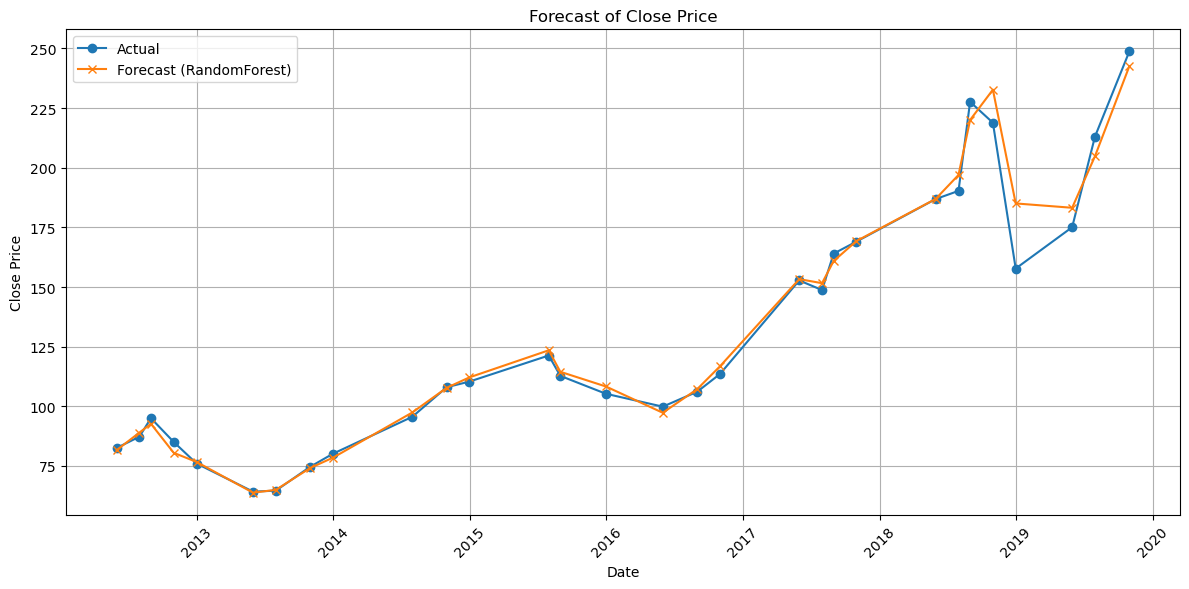

In [246]:
# Plotting Actual and Forecast Close prices (RandomForest)

plot_df = pd.DataFrame({
    'Date': dates_test,
    'Actual': y_test.values,
    'Predicted': grid_predsrf
})

# Sort by Date
plot_df = plot_df.sort_values('Date')

# Plot
plt.figure(figsize=(12, 6))
plt.plot(plot_df['Date'], plot_df['Actual'], label='Actual', marker='o')
plt.plot(plot_df['Date'], plot_df['Predicted'], label='Forecast (RandomForest)', marker='x')
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.title("Forecast of Close Price")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

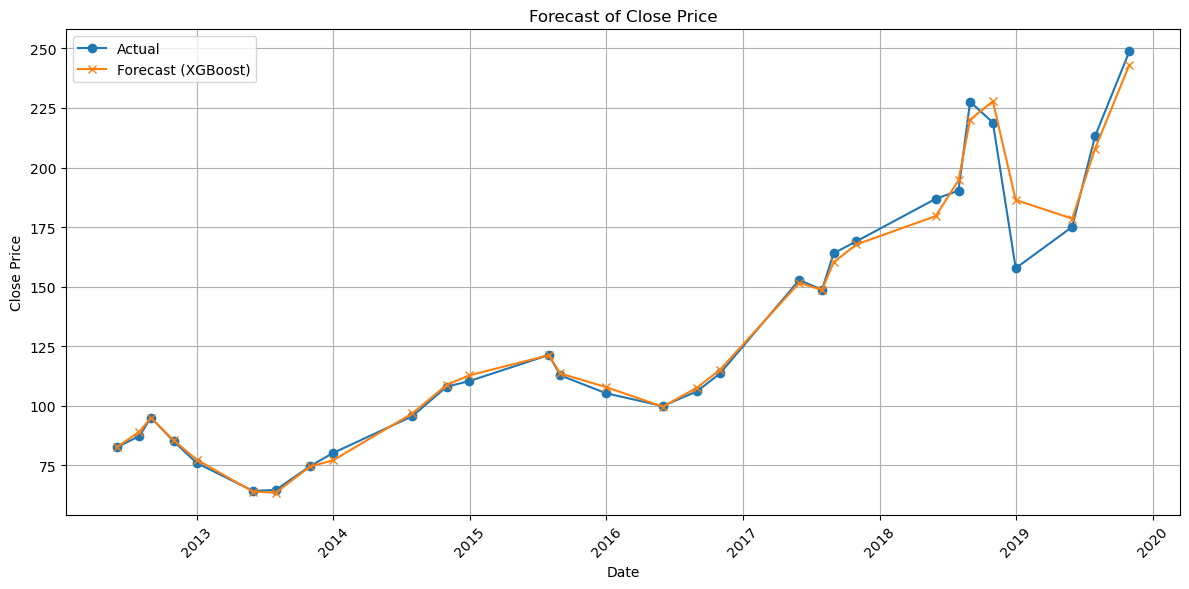

In [247]:
# Plotting Actual and Forecast Close prices (XGBoost)

plot_df = pd.DataFrame({
    'Date': dates_test,
    'Actual': y_test.values,
    'Predicted': grid_preds
})

# Sort by Date
plot_df = plot_df.sort_values('Date')

# Plot
plt.figure(figsize=(12, 6))
plt.plot(plot_df['Date'], plot_df['Actual'], label='Actual', marker='o')
plt.plot(plot_df['Date'], plot_df['Predicted'], label='Forecast (XGBoost)', marker='x')
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.title("Forecast of Close Price")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Forescast 30 days

In [248]:
import pandas as pd
import numpy as np
from datetime import timedelta
import matplotlib.pyplot as plt

In [249]:
forecast_df = df.copy()
n_forecast = 30
future_predictions = []

# Convert 'Date' to datetime
forecast_df['Date'] = pd.to_datetime(forecast_df['Date'])

# Get the feature columns
feature_cols = list(best_xgb.get_booster().feature_names)
dummy_training_features = ['Open', 'High', 'Low', 'Adj Close', 'Volume']

# Start from the last known date
last_known_date = forecast_df['Date'].max()

In [250]:
# forecasting loop

for _ in range(n_forecast):
    next_date = last_known_date + timedelta(days=1)
    # Skip weekends
    while next_date.weekday() >= 5:
        next_date += timedelta(days=1)

    # Build new row with features
    new_row = {
        'Date': next_date,
        'Year': next_date.year,
        'Month': next_date.month,
        'Day': next_date.day,
        'Weekday': next_date.weekday(),
        'DayOfYear': next_date.timetuple().tm_yday,
    }

    # Lag features
    for lag in [1, 2, 3, 5, 7, 14]:
        new_row[f'Close_lag_{lag}'] = forecast_df['Close'].iloc[-lag] if len(forecast_df) >= lag else np.nan

    # Rolling features
    for window in [7, 14]:
        new_row[f'Close_roll_mean_{window}'] = forecast_df['Close'].rolling(window).mean().iloc[-1]
        new_row[f'Close_roll_std_{window}'] = forecast_df['Close'].rolling(window).std().iloc[-1]
        new_row[f'Volume_roll_mean_{window}'] = forecast_df['Volume'].rolling(window).mean().iloc[-1] if 'Volume' in forecast_df.columns else 0.0

    # Return feature
    if len(forecast_df) >= 2:
        new_row['Return_1d'] = (forecast_df['Close'].iloc[-1] - forecast_df['Close'].iloc[-2]) / forecast_df['Close'].iloc[-2]
    else:
        new_row['Return_1d'] = 0.0

    # Candle-derived features
    last_close = forecast_df['Close'].iloc[-1]
    last_open = last_high = last_low = last_close  # fallback to last_close

    new_row['High_Low_Spread'] = last_high - last_low
    new_row['Body'] = abs(last_open - last_close)
    new_row['Close/Open'] = last_close / last_open if last_open != 0 else 0
    new_row['Close/High'] = last_close / last_high if last_high != 0 else 0
    new_row['Close/Low'] = last_close / last_low if last_low != 0 else 0

    # Dummy placeholders for dropped features (like Open, High, Low, etc.)
    for col in dummy_training_features:
        new_row[col] = last_close

    # Format row for model
    new_row_df = pd.DataFrame([new_row])

    # Fill missing feature columns
    for col in feature_cols:
        if col not in new_row_df.columns:
            new_row_df[col] = 0.0
    new_row_df = new_row_df[feature_cols].fillna(0.0)

    # Predict next Close
    next_close = best_xgb.predict(new_row_df)[0]
    new_row['Close'] = next_close

    # Append to forecast_df and update for next loop
    forecast_df = pd.concat([forecast_df, pd.DataFrame([new_row])], ignore_index=True)
    future_predictions.append(next_close)

    # Update last_known_date to the newly added future date
    last_known_date = next_date

In [251]:
# Ensure 'Date' stays datetime
forecast_df['Date'] = pd.to_datetime(forecast_df['Date'])

In [252]:
forecast_df.tail(n_forecast)[['Date', 'Close']]

,Date,Close
1997,2019-12-31,242.116211
1998,2020-01-01,175.543381
1999,2020-01-02,154.974289
2000,2020-01-03,152.598175
2001,2020-01-06,164.812714
2002,2020-01-07,169.855988
2003,2020-01-08,170.913361
2004,2020-01-09,168.137024
2005,2020-01-10,168.347565
2006,2020-01-13,167.281998
